In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

from sklearn.manifold import TSNE

import gower



In [43]:
data = pd.read_csv('actualData.csv')
data = data.set_index('id')
data

,stream,scope,grid,solution,temp,ice_particles,ice_mass,ice_length
id,,,,,,,,
contrails1,two,nozzle,coarse,uncoupled,232.948,53428,0.030635,13.003
contrails2,two,nozzle,coarse,uncoupled,242.700,51338,0.030636,13.335
contrails3,two,nozzle,coarse,uncoupled,234.632,55328,0.031669,13.236
210,two,nozzle,coarse,uncoupled,233.858,13262,0.000022,48.179
211,two,nozzle,coarse,uncoupled,232.828,11324,0.000018,39.344
212,two,nozzle,coarse,uncoupled,232.491,10716,0.000014,50.059
213,two,nozzle,coarse,uncoupled,232.615,9044,0.000012,49.466
214,two,nozzle,coarse,uncoupled,232.290,9044,0.000012,48.686
215,two,nozzle,coarse,uncoupled,227.968,11704,0.000010,49.284


In [44]:
"""Gower’s disatance/measure/coefficient/similarity is a measure to find
the similarity between two rows of a dataset consisting of mixed type attributes.
It uses the concept of Manhattan distance for continuous variables and dice
distance for measuring similarity between Binary variables.

https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2

https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad

https://bpostance.github.io/posts/clustering-mixed-data/
"""




# cat = [True, True, True, True,True,True,False,False,False,False,False]

# print(cat)

gd = gower.gower_matrix(data)

print(f"Data shape: {data.shape}\nMatrix shape: {gd.shape}")
# print(gd)

Data shape: (13, 8)
Matrix shape: (13, 13)


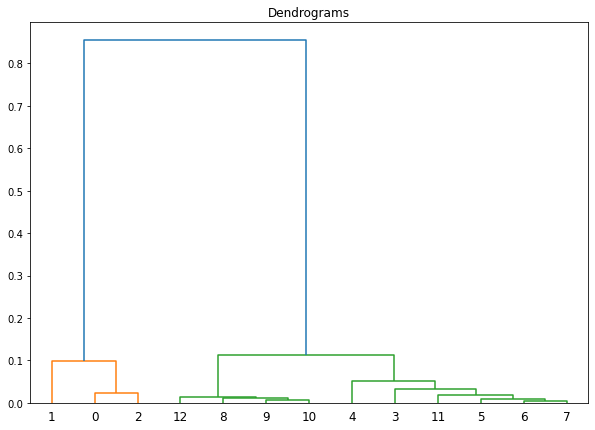

In [45]:


gdv = squareform(gd,force='tovector')

# print(gdv)


Z = linkage(gdv,method='ward')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)


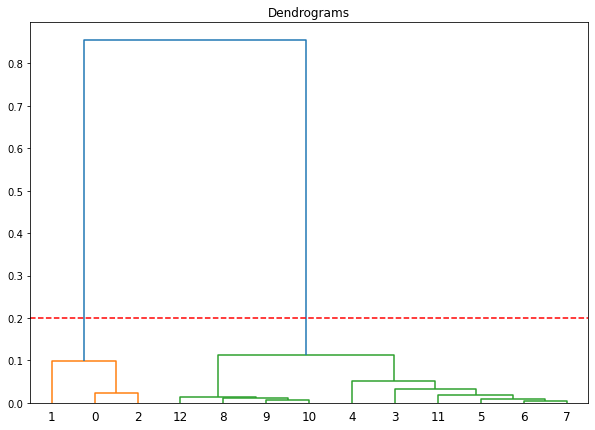

In [46]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)
plt.axhline(y=0.2, color='r', linestyle='--')

In [47]:
cluster_array = fcluster(Z, 2, criterion='maxclust')
print(cluster_array)

[1 1 1 2 2 2 2 2 2 2 2 2 2]


C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 12 nearest neighbors...
[t-SNE] Indexed 13 samples in 0.000s...
[t-SNE] Computed neighbors for 13 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 13 / 13
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.167572
[t-SNE] KL divergence after 500 iterations: 0.306874


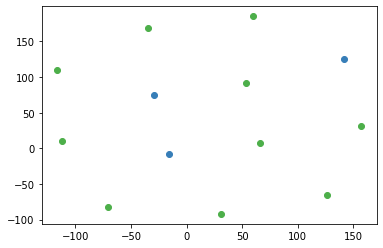

In [48]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne = tsne_model.fit_transform(gd)
tsne = pd.DataFrame(tsne)
tsne['k'] = cluster_array

cdict = {i:cm.Set1(i) for i in np.unique(cluster_array)}

for cluster in np.unique(cluster_array): # plot data by cluster
    plt.scatter(x=tsne.where(tsne['k']==cluster)[0],
                y=tsne.where(tsne['k']==cluster)[1],
                color=cdict[cluster],
                label=cluster)